In [1]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [2]:
train_path = "/content/drive/MyDrive/best_model/train"
test_path = "/content/drive/MyDrive/best_model/test"

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from imutils import paths

In [4]:
import random
seed = 10
image_paths_train = sorted(list(paths.list_images(train_path)))

In [5]:
random.seed(seed)
random.shuffle(image_paths_train)

In [6]:
image_paths_train[:5]

['/content/drive/MyDrive/best_model/train/cat.384.jpg',
 '/content/drive/MyDrive/best_model/train/cat.298.jpg',
 '/content/drive/MyDrive/best_model/train/dog.412.jpg',
 '/content/drive/MyDrive/best_model/train/cat.348.jpg',
 '/content/drive/MyDrive/best_model/train/dog.348.jpg']

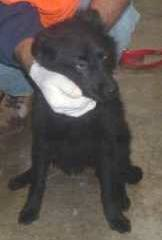

In [7]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/best_model/train/dog.412.jpg'
display(Image(filename=image_path))

In [8]:
import cv2

image = cv2.imread(image_paths_train[0])
print("Shape of image : ",image.shape)


Shape of image :  (375, 499, 3)


In [ ]:
import imutils
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    plt.grid()
    ax = fig.add_subplot(111)
    ax.imshow(img)

In [ ]:

## We need to resize the image to a common size for the machine learning model to apply mathematics over it.

In [ ]:
image = cv2.resize(image , (28,28))
print("Shape of resized images :",image.shape)

Shape of resized images : (28, 28, 3)


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
## We need to convert the image to an array in preprocessing steps.

In [ ]:
image = img_to_array(image)
image

array([[[ 54.,  57.,  55.],
        [ 68.,  71.,  66.],
        [ 53.,  57.,  52.],
        ...,
        [ 77.,  86.,  90.],
        [146., 148., 144.],
        [ 94.,  95.,  94.]],

       [[ 55.,  60.,  58.],
        [ 54.,  57.,  55.],
        [ 44.,  47.,  45.],
        ...,
        [ 74.,  77.,  79.],
        [149., 149., 143.],
        [ 92.,  92.,  92.]],

       [[ 37.,  40.,  38.],
        [ 44.,  43.,  42.],
        [ 57.,  68.,  65.],
        ...,
        [ 77.,  80.,  85.],
        [154., 154., 148.],
        [ 85.,  87.,  88.]],

       ...,

       [[ 82.,  76.,  75.],
        [102.,  96.,  97.],
        [ 72.,  66.,  67.],
        ...,
        [ 62.,  69.,  72.],
        [ 72.,  73.,  71.],
        [ 83.,  84.,  82.]],

       [[109., 104., 103.],
        [ 95.,  89.,  89.],
        [ 91.,  86.,  85.],
        ...,
        [ 65.,  71.,  74.],
        [ 80.,  81.,  79.],
        [ 75.,  76.,  74.]],

       [[ 91.,  86.,  83.],
        [ 76.,  72.,  71.],
        [105., 1

In [ ]:
## To get the output label names we need to fetch it from the name itself.

In [ ]:
import os
image_paths_train[0].split("/")[-1].split(".")[0]

'cat'

In [ ]:
## All the above steps were just for our understanding.

In [ ]:
from tqdm import tqdm_notebook as tqdm
train_x = []
train_y = []

In [ ]:
# Importing input datas

with tqdm(total=len(image_paths_train)) as pbar:
  for i in image_paths_train:
    image = cv2.imread(i)
    image = cv2.resize(image,(28,28))
    image = img_to_array(image)
    train_x.append(image)
    pbar.update(1)

  0%|          | 0/1001 [00:00<?, ?it/s]

In [ ]:

len(train_x)

1001

In [ ]:
# Importing label datas

for i in image_paths_train:
    label = i.split("/")[-1].split(".")[0]
    if label == "cat":
      label = 0
    else:
      label = 1
    train_y.append(label)



In [ ]:
len(train_y)

1001

In [ ]:
# convert these train_x, train_y lists to array format

In [ ]:
import numpy as np

In [ ]:
train_x = np.array(train_x,dtype="float")/255.0
train_y = np.array(train_y)

In [ ]:
print("Input variables shape : ",train_x.shape)
print("Labels shape : ",train_y.shape)

Input variables shape :  (1001, 28, 28, 3)
Labels shape :  (1001,)


In [ ]:
from sklearn.model_selection import train_test_split
(trainx, valx, trainy, valy) = train_test_split(train_x, train_y, test_size=0.40, random_state=seed)



In [ ]:
trainx.shape

(600, 28, 28, 3)

In [ ]:
valx.shape

(401, 28, 28, 3)

In [ ]:
valy

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [ ]:
trainy

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,

In [ ]:
from tensorflow.keras.utils import to_categorical
trainy = to_categorical(trainy, num_classes = 2)
valy = to_categorical(valy,num_classes=2)

In [ ]:
trainy

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
valy

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(rotation_range = 30,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,
                         shear_range = 0.2,
                         zoom_range = 0.2,
                         horizontal_flip = True,
                         fill_mode = "nearest")

In [ ]:
EPOCHS = 10
INIT_LR = 1e-3
BS = 2

In [ ]:

from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential


In [ ]:
# create CNN Model

class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model
        model = Sequential()                ## siamese networks
        inputShape = (height, width, depth)

        # if we are using "channels first", update the input shape
        print(K.image_data_format())
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)

        # first set of CONV => RELU => POOL layers
        model.add(Conv2D(20, (5, 5), padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model

In [ ]:
# initialize the model
print("[INFO] compiling model...")
model = LeNet.build(width=28, height=28, depth=3, classes=2)
opt = Adam(learning_rate=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
print("[INFO] model complied...")

[INFO] compiling model...
channels_last
[INFO] model complied...


In [ ]:

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 20)        1520      
                                                                 
 activation_8 (Activation)   (None, 28, 28, 20)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 20)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 50)        25050     
                                                                 
 activation_9 (Activation)   (None, 14, 14, 50)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 50)         0         
 2D)                                                  

In [ ]:
BS = 2

print("[INFO] training network...")
H = model.fit(x=aug.flow(trainx,trainy, batch_size=BS),
              validation_data=(valx, valy),
              steps_per_epoch=len(trainx) // BS,
              epochs=EPOCHS,
              verbose=1)

[INFO] training network...
Epoch 1/10
300/300 [==============================] - 12s 6ms/step - loss: 0.7035 - accuracy: 0.4833 - val_loss: 0.6933 - val_accuracy: 0.4688
Epoch 2/10
300/300 [==============================] - 2s 5ms/step - loss: 0.6975 - accuracy: 0.5067 - val_loss: 0.6928 - val_accuracy: 0.4913
Epoch 3/10
300/300 [==============================] - 2s 5ms/step - loss: 0.6962 - accuracy: 0.5167 - val_loss: 0.6936 - val_accuracy: 0.4713
Epoch 4/10
300/300 [==============================] - 2s 5ms/step - loss: 0.6949 - accuracy: 0.5017 - val_loss: 0.6946 - val_accuracy: 0.4713
Epoch 5/10
300/300 [==============================] - 2s 5ms/step - loss: 0.6931 - accuracy: 0.5183 - val_loss: 0.6954 - val_accuracy: 0.4713
Epoch 6/10
300/300 [==============================] - 2s 6ms/step - loss: 0.6927 - accuracy: 0.5200 - val_loss: 0.6937 - val_accuracy: 0.4713
Epoch 7/10
300/300 [==============================] - 2s 8ms/step - loss: 0.6934 - accuracy: 0.5117 - val_loss: 0.6931 -

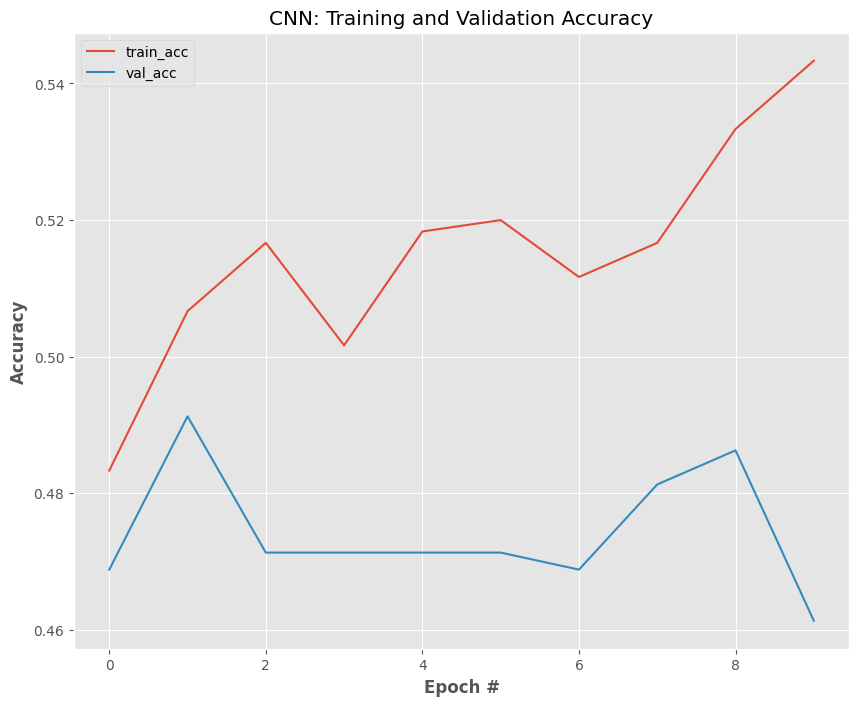

In [ ]:
# plot the training and validation accuracy
import matplotlib.pyplot as plt
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("CNN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/best_model/cat_dog_new.model")

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/best_model/cat_dog_new.model")

In [ ]:
import imutils
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    plt.grid()
    ax = fig.add_subplot(111)
    ax.imshow(img)

In [ ]:
from tqdm import tqdm_notebook as tqdm

# initialize the data and labels
print("[INFO] loading images...")

predicted_label = []
image_numbers = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(test_path)))
random.seed(seed)
random.shuffle(imagePaths)

# progress bar
with tqdm(total=len(imagePaths)) as pbar:
    # loop over the input images
    for idx, imagePath in enumerate(imagePaths):
        # load the image, pre-process it, and store it in the data list
        image = cv2.imread(imagePath)
        orig = image.copy()
        image = cv2.resize(image, (28, 28))
        image = image.astype("float") / 255.0
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)

        image_number = imagePath.split("/")[-1].split(".")[0]
        image_numbers.append(image_number)

        # classify the input image
        prd_conf = model.predict(image)[0]

        all_class = ["Cat","Dog"]
        # build the label
        label = all_class[np.argmax(prd_conf)]
        predicted_label.append(label)
        proba = prd_conf[np.argmax(prd_conf)]

        label = "{}: {:.2f}%".format(label, proba * 100)

        # draw the label on the image
        output = imutils.resize(orig, width=200)
        cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
            0.7, (255, 0, 0), 2)

        # convert img to rgb format and display in notebook
        img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        display_img(img)

        pbar.update(1)


Output hidden; open in https://colab.research.google.com to view.